In [1]:
from source.spinsystem import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from numpy import empty, nan, savetxt

In [2]:
MAX_FILE_SIZE = 100_000

config_filename = "multising.conf"
config = read_config_file(config_filename)

In [3]:
# Paramètres
grid_height = int(config["grid_height"])
grid_width  = int(config["grid_width"])
alpha       = float(config["alpha"])
j           = float(config["j"])
total_updates = int(config["total_updates"])
init_up     = float(config["init_up"])
#beta        = float(config["beta"])
T           = float(config["T"])
beta        = 1/T

reduced_alpha              = -2 * beta * alpha
reduced_neighbour_coupling = -2 * beta * j

# On stocke la magnétisation
magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
magnetisation[:] = nan

# Instancie le système
spin_system = SpinSystem(
    grid_height=grid_height,
    grid_width=grid_width,
    init_up=init_up
)

full_grids = []
full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))

In [4]:
for ii in range(total_updates):
    # Mise à jour
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

    # Sauvegarde tous les MAX_FILE_SIZE
    if ii > 0 and (ii % MAX_FILE_SIZE == 0):
        savetxt(f"magnetisation_{ii}.dat", magnetisation)
        magnetisation[:] = nan

# Sauvegarde finale
savetxt(f"magnetisation_{ii}.dat", magnetisation)

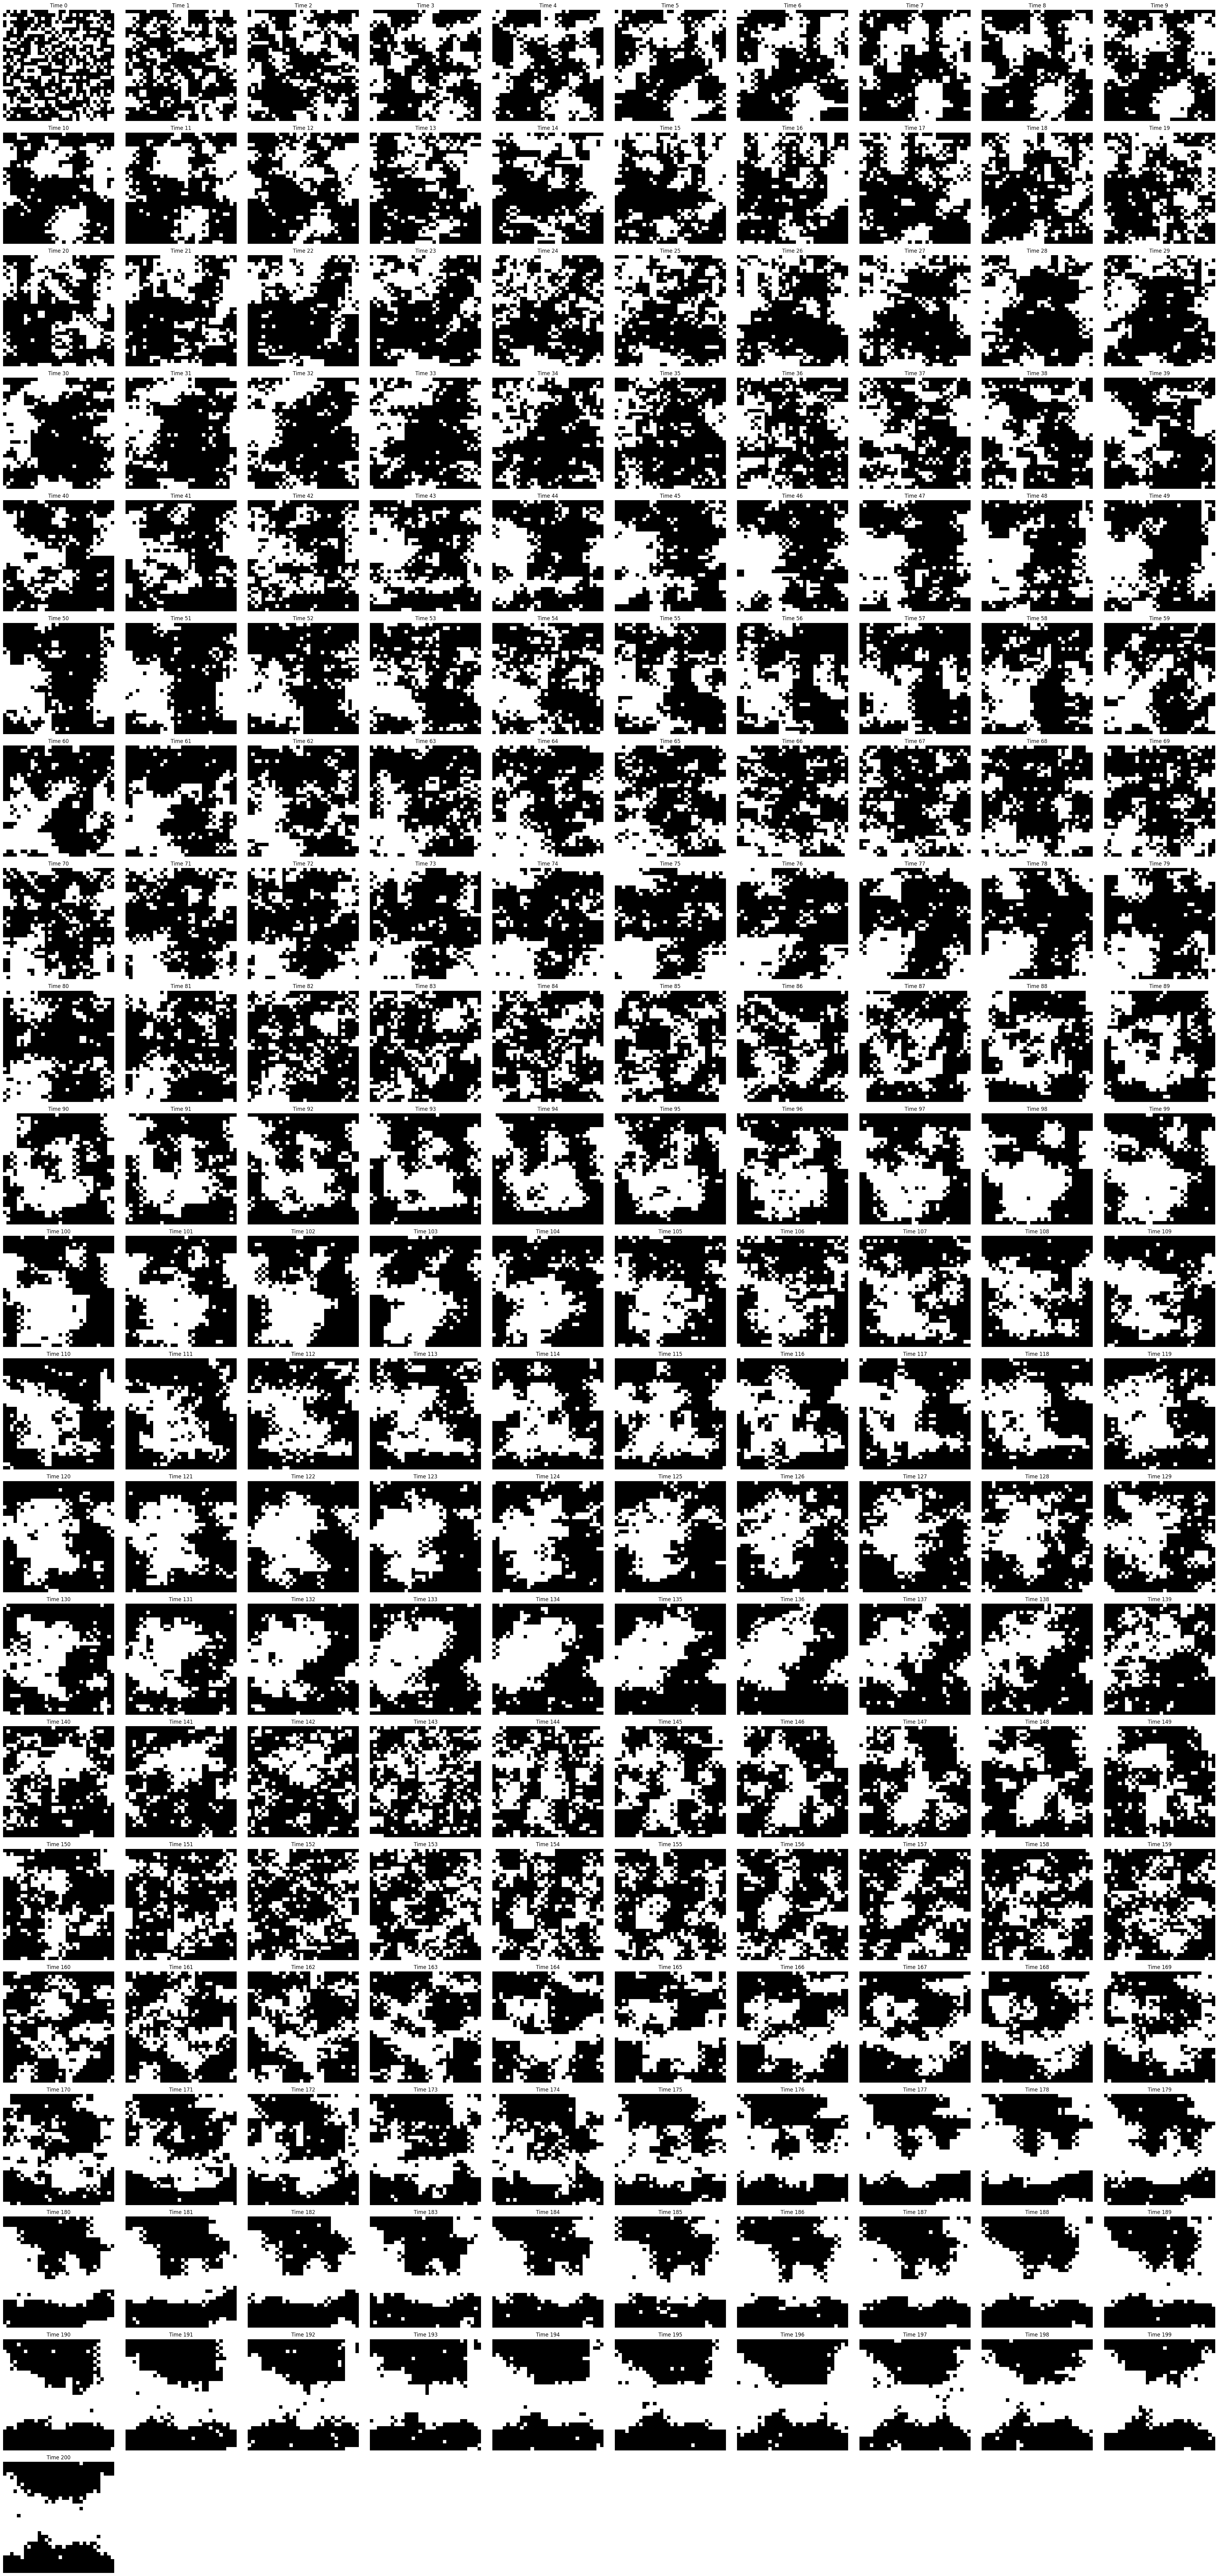

In [5]:
plot_array_list(full_grids, max_cols=10)

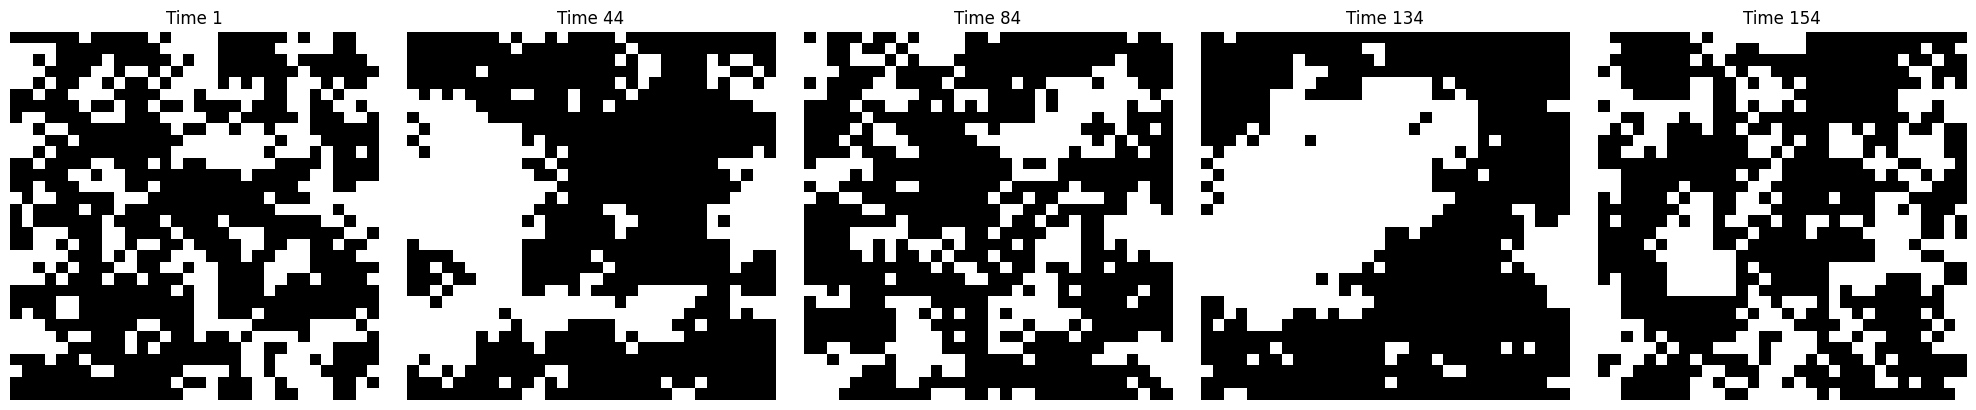

In [8]:
plot_array_list(np.array([full_grids[1], full_grids[44], full_grids[84], full_grids[134], full_grids[154]]), max_cols=5, timesteps=[1,44,84,134,154])

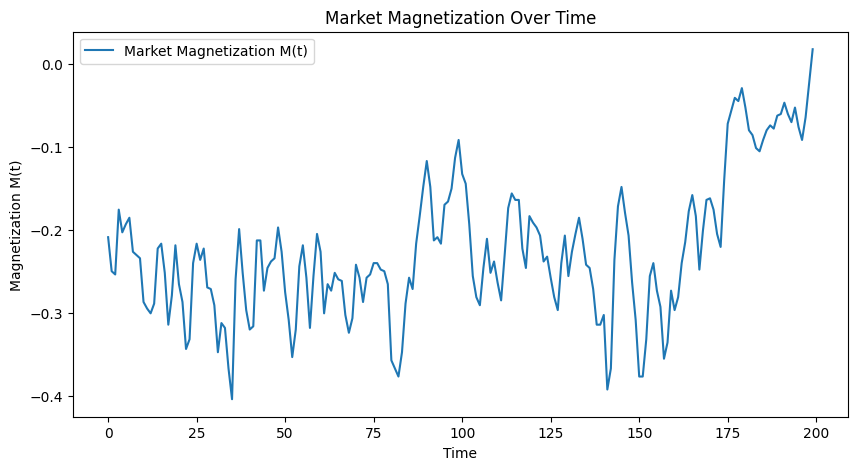

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(magnetisation, label="Market Magnetization M(t)")
plt.xlabel("Time")
plt.ylabel("Magnetization M(t)")
plt.title("Market Magnetization Over Time")
plt.legend()
plt.show()


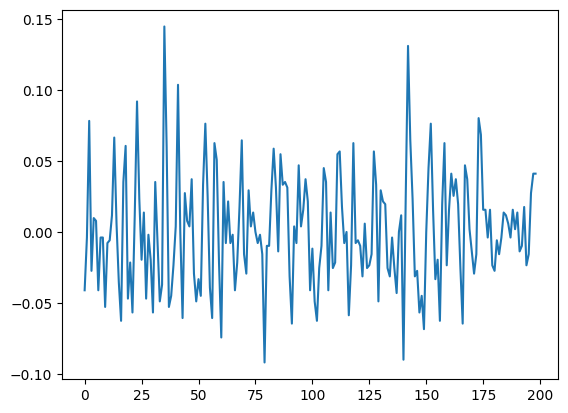

In [10]:
market_returns = np.diff(magnetisation)
plt.plot(market_returns)

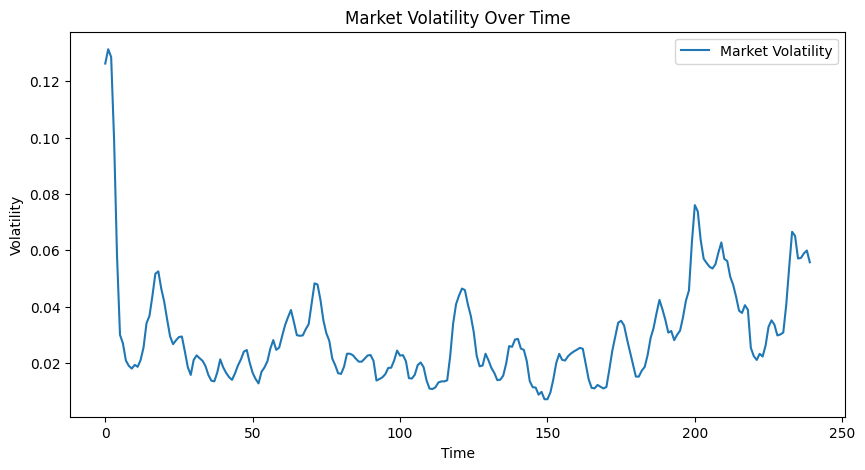

In [13]:
window_size = 10  # Fenêtre pour la volatilité
volatility = [np.std(magnetisation[i:i+window_size]) for i in range(len(magnetisation)-window_size)]

plt.figure(figsize=(10, 5))
plt.plot(volatility, label="Market Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()


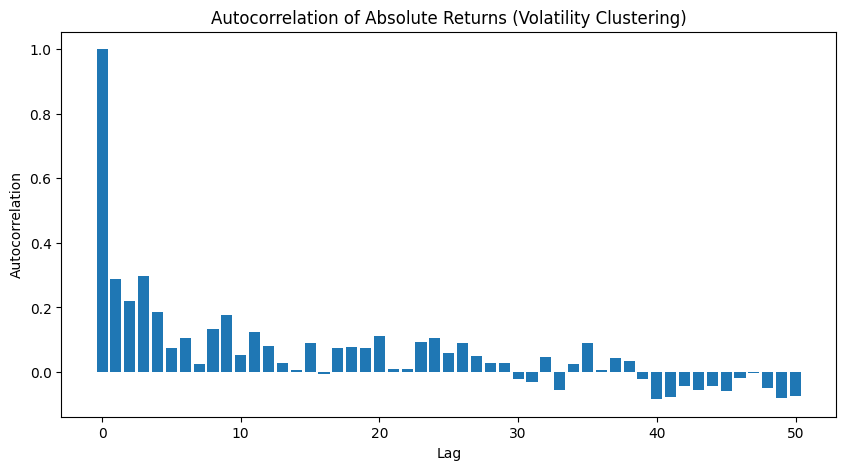

In [14]:
from statsmodels.tsa.stattools import acf

abs_returns = np.abs(market_returns)

autocorr_volatility = acf(abs_returns, nlags=50)

plt.figure(figsize=(10, 5))
plt.bar(range(len(autocorr_volatility)), autocorr_volatility)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Absolute Returns (Volatility Clustering)")
plt.show()
